In [64]:
import pandas as pd
import numpy as np
import sys, os, re
import pickle as pkl

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score,classification_report,confusion_matrix,log_loss
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [67]:
from warnings import filterwarnings
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier


In [68]:
df_train = pd.read_csv('./Arya_DataScientist_Assignment/training_set.csv')
df_test = pd.read_csv('./Arya_DataScientist_Assignment/test_set.csv')
df_train

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.00,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,3905,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.714,4,12,0
3906,3906,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,2.000,3,4,0
3907,3907,0.12,0.00,0.12,0.00,0.00,0.25,0.00,0.00,0.00,...,0.0,0.093,0.0,0.023,0.000,0.000,1.247,5,131,0
3908,3908,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.12,0.00,...,0.0,0.198,0.0,0.198,0.198,0.000,3.857,25,81,1


In [69]:
df_train.shape, df_test.shape

((3910, 59), (691, 58))

Text(0.5, 1.0, 'Correlation between different fitures')

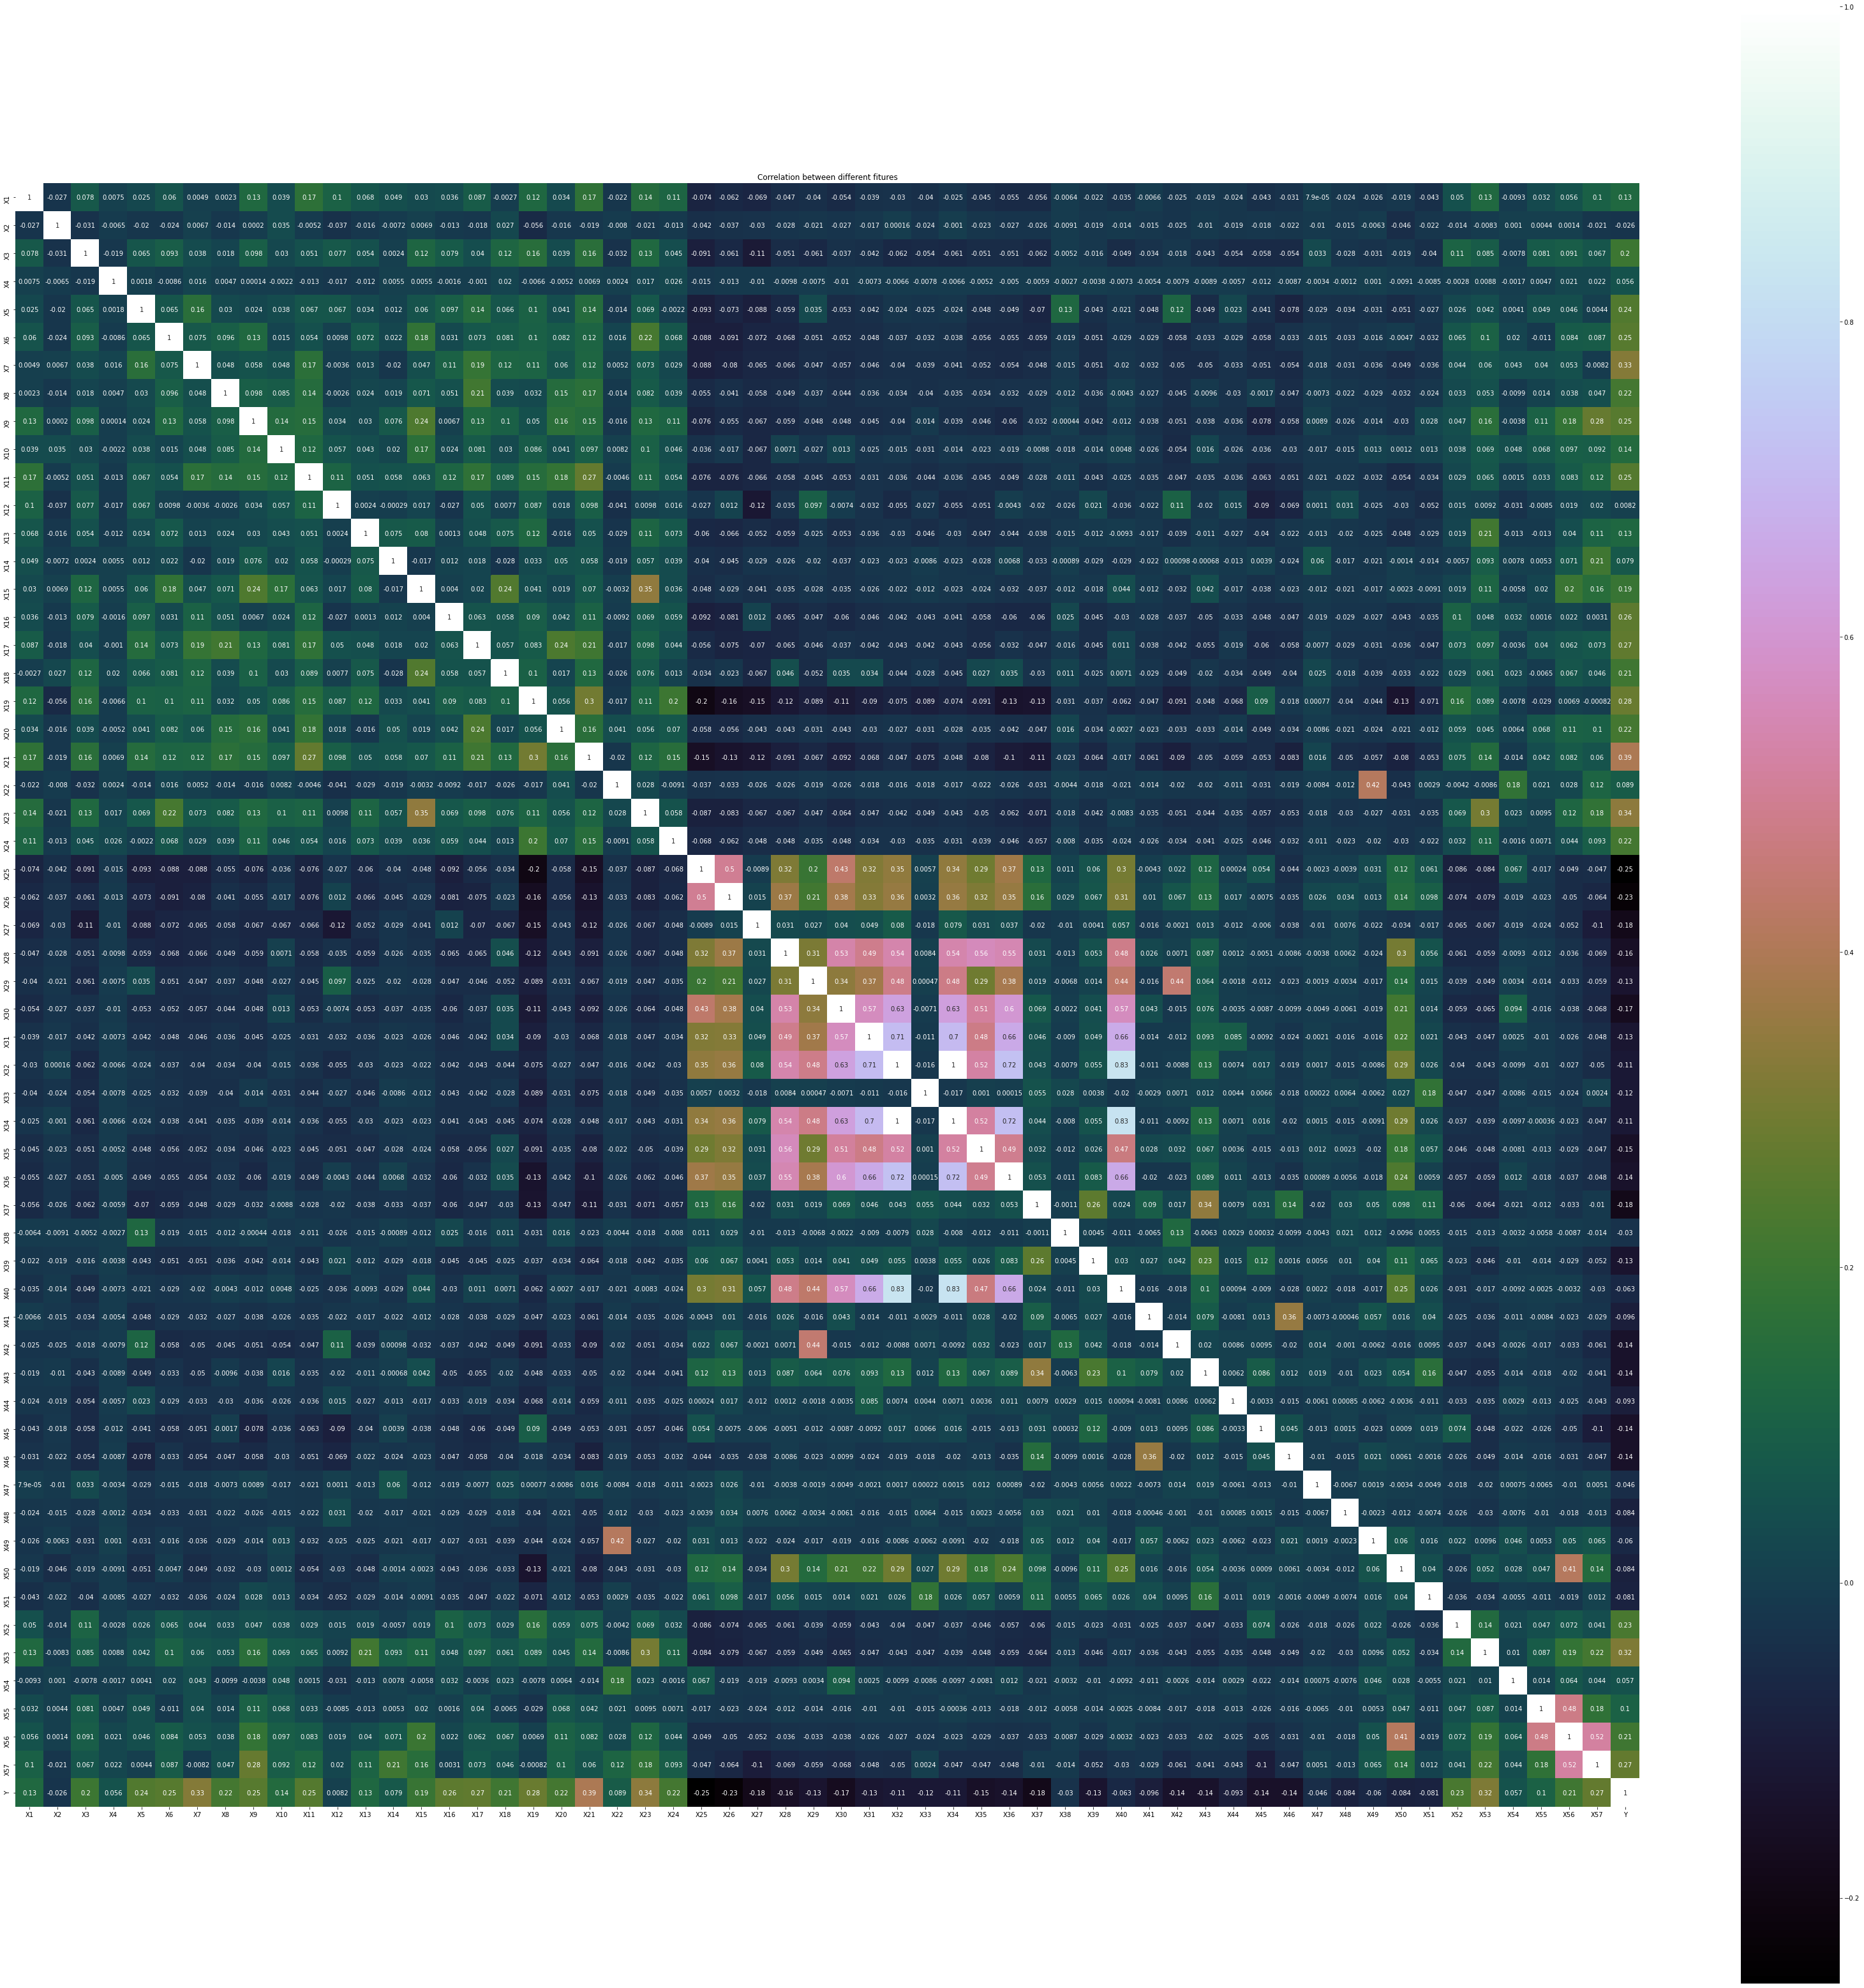

In [91]:
correleation = df_train.corr()
plt.figure(figsize=(57,57))
sns.heatmap(correleation, vmax=1, square=True, annot=True, cmap='cubehelix')
plt.title("Correlation between different fitures")

In [70]:
# Checking for missing values
df_train.isnull().sum()
df_train.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,...,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,1954.500000,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,...,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,1128.864105,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,...,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,977.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,1954.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,2931.750000,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.188000,0.000000,0.317250,0.054000,0.000000,3.714000,43.000000,264.000000,1.000000
max,3909.000000,4.340000,14.280000,4.540000,42.810000,9.090000,3.570000,7.270000,11.110000,3.230000,...,4.385000,9.752000,2.777000,32.478000,6.003000,19.829000,1102.500000,9989.000000,10062.000000,1.000000


In [71]:
importance_data = mutual_info_classif(df_train.drop(['Unnamed: 0', 'Y'], axis=1), df_train['Y'])
feat_importance = pd.Series(importance_data, index=df_train.columns[1:-1])
# importance_data
# feat_importance

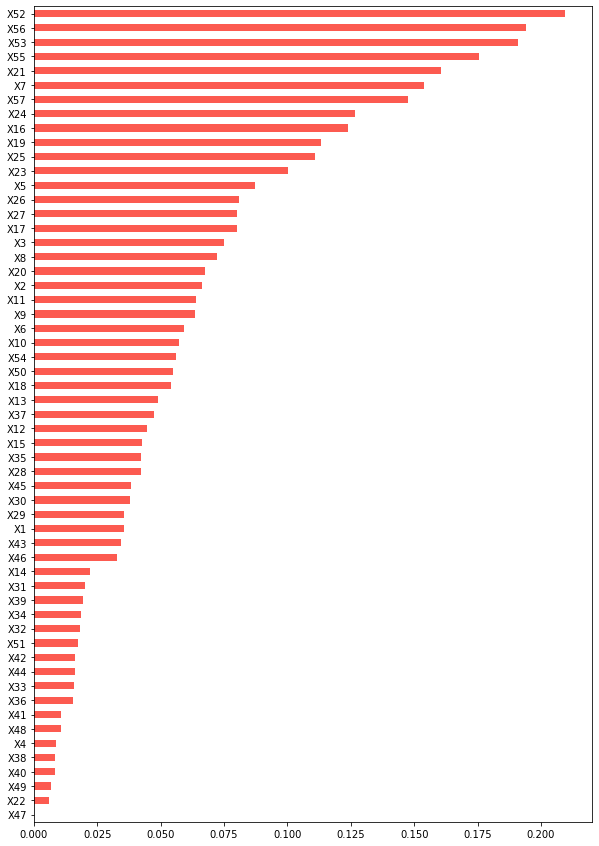

In [72]:
feat_importance.sort_values().plot(kind='barh', color=sns.xkcd_rgb['coral'], figsize=[10,15])
plt.show()


In [73]:
# df_train
df_train = df_train.drop(labels=['Unnamed: 0'], axis=1)
X = df_train.iloc[:,0:57]
Y = df_train.iloc[:,57]
# print(Y)
Y

0       0
1       1
2       0
3       1
4       1
       ..
3905    0
3906    0
3907    0
3908    1
3909    1
Name: Y, Length: 3910, dtype: int64

In [74]:
#Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_test


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
2793,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.08,0.00,0.00,...,0.34,0.081,0.451,0.000,0.000,0.000,0.00,1.833,18,935
2803,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.000,0.000,0.000,0.000,0.00,3.222,9,29
2218,1.36,0.00,0.68,0.0,0.00,0.00,0.68,0.00,0.00,0.00,...,0.00,0.000,0.000,0.000,1.706,0.200,0.00,4.281,38,137
3111,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.150,0.000,0.000,0.000,0.00,1.850,15,37
3161,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.000,0.000,0.000,0.763,0.00,2.181,6,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.000,0.000,0.374,0.000,0.00,1.375,5,22
3759,0.00,0.00,0.65,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.061,0.061,0.061,0.000,0.00,1.392,11,71
2764,0.00,0.00,0.71,0.0,0.23,0.00,0.00,0.00,0.23,0.23,...,0.00,0.000,0.112,0.000,1.046,0.037,0.00,4.022,97,543
2389,0.00,0.81,0.61,0.0,0.00,1.02,0.00,0.20,0.40,0.61,...,0.00,0.000,0.095,0.000,0.158,0.063,0.00,2.000,31,156


In [82]:
#Random Forest Classifier for Feature Selection
rf_clf = RandomForestClassifier(100, max_depth=None, n_jobs=-1)

rf_clf.fit(X_train,y_train)
feature_importance = rf_clf.feature_importances_
feature_importance
# rf_clf

array([0.00362177, 0.00503231, 0.00771208, 0.00057087, 0.02744341,
       0.00847864, 0.07719802, 0.01427832, 0.00394318, 0.00820928,
       0.00975406, 0.01129661, 0.00385135, 0.00215037, 0.00136884,
       0.06659516, 0.01216549, 0.00911799, 0.03285025, 0.00515367,
       0.05450541, 0.00172276, 0.02313165, 0.04147622, 0.04409006,
       0.01443468, 0.01600955, 0.0052147 , 0.00164526, 0.00292043,
       0.00137436, 0.00099722, 0.0028505 , 0.00111772, 0.0034045 ,
       0.00257172, 0.01112144, 0.00039837, 0.00421038, 0.00118166,
       0.00127861, 0.00555858, 0.00070954, 0.00192039, 0.01040265,
       0.01376422, 0.00024614, 0.00137131, 0.00461785, 0.01407692,
       0.00283489, 0.12963735, 0.10573268, 0.00280203, 0.06147216,
       0.05531657, 0.04308788])

In [83]:
fi = sorted(zip(X.columns,feature_importance),key=lambda x: x[1], reverse=True)
# fi
#Extracting Top 30 features from data
top_features = [x[0] for x in fi[:30]]
top_features

['X52',
 'X53',
 'X7',
 'X16',
 'X55',
 'X56',
 'X21',
 'X25',
 'X57',
 'X24',
 'X19',
 'X5',
 'X23',
 'X27',
 'X26',
 'X8',
 'X50',
 'X46',
 'X17',
 'X12',
 'X37',
 'X45',
 'X11',
 'X18',
 'X6',
 'X10',
 'X3',
 'X42',
 'X28',
 'X20']

In [84]:
# Selecting the top features from data
X_train_dash = X_train[top_features]

X_test_dash = X_test[top_features]
X_train_dash

,X52,X53,X7,X16,X55,X56,X21,X25,X57,X24,...,X37,X45,X11,X18,X6,X10,X3,X42,X28,X20
247,0.000,0.000,0.00,0.00,1.000,1,0.00,0.00,5,0.00,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0
2958,1.900,0.475,0.00,0.00,1.763,11,3.79,0.00,67,0.00,...,0.0,0.00,0.0,5.06,0.00,0.00,1.26,0.0,0.0,0.0
2968,0.072,0.108,0.23,0.23,2.438,20,1.89,0.00,178,0.47,...,0.0,0.00,0.0,0.00,0.00,0.70,0.47,0.0,0.0,0.0
2676,0.473,0.000,0.00,0.00,1.687,5,0.00,0.00,27,0.00,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0
2776,0.000,0.000,0.00,0.00,1.000,1,0.00,0.00,10,0.00,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.000,0.000,0.00,0.00,1.285,5,1.69,0.00,27,0.00,...,0.0,0.00,0.0,0.00,0.00,0.84,0.00,0.0,0.0,0.0
1294,0.573,0.000,0.00,0.00,2.884,18,0.00,0.00,75,0.00,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0
860,0.000,0.000,0.00,0.00,3.800,29,2.85,0.00,38,0.00,...,0.0,2.85,0.0,2.85,0.00,0.00,0.00,0.0,0.0,0.0
3507,0.456,0.500,0.13,0.27,6.049,129,1.45,0.00,2220,0.60,...,0.0,0.06,0.3,0.03,0.03,0.77,0.33,0.0,0.0,0.0


In [85]:
# Selecting top features from test data
test_data_dash = df_test[top_features]
test_data_dash


,X52,X53,X7,X16,X55,X56,X21,X25,X57,X24,...,X37,X45,X11,X18,X6,X10,X3,X42,X28,X20
0,0.105,0.000,0.00,0.00,2.342,47,0.00,0.00,89,0.00,...,0.00,1.41,0.00,0.00,0.00,0.00,0.70,0.00,0.00,0.0
1,0.776,0.129,0.84,0.00,10.375,168,1.69,0.00,249,0.84,...,0.00,0.00,0.00,0.00,0.00,0.00,0.84,0.00,0.00,0.0
2,0.325,0.756,0.05,0.25,5.891,193,1.46,0.00,3040,0.36,...,0.00,0.02,0.25,0.02,0.12,0.74,0.46,0.00,0.00,0.0
3,0.490,0.158,0.50,0.10,8.550,669,0.70,0.00,1351,0.10,...,0.00,0.10,0.30,1.11,0.80,0.10,1.01,0.00,0.00,0.2
4,0.729,0.121,0.72,0.00,7.781,32,1.45,0.00,249,0.72,...,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,0.043,0.000,0.00,0.25,2.111,17,0.00,2.06,190,0.00,...,0.25,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.0
687,0.375,0.000,0.00,0.00,2.250,7,0.00,0.00,36,0.00,...,2.56,2.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
688,0.000,0.000,0.00,0.00,2.333,5,0.00,0.00,7,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
689,0.057,0.022,0.00,0.00,1.875,65,0.40,1.38,542,0.00,...,0.08,0.08,0.00,0.00,0.00,0.00,0.57,0.89,0.00,0.0


In [86]:
# Normalizing our data using Standard Scaler
scaler = StandardScaler()
scaler.fit(X_train_dash)

# transform data
X_train_dash = pd.DataFrame(scaler.transform(X_train_dash),columns=X_train_dash.columns)
X_test_dash = pd.DataFrame(scaler.transform(X_test_dash),columns=X_test_dash.columns)
X_test_dash


,X52,X53,X7,X16,X55,X56,X21,X25,X57,X24,...,X37,X45,X11,X18,X6,X10,X3,X42,X28,X20
0,-0.321195,-0.307141,-0.288686,-0.300903,-0.131527,-0.154650,-0.679675,-0.280636,1.105728,-0.208168,...,-0.329917,-0.311402,-0.301543,-0.354284,-0.362346,-0.368156,-0.563281,-0.182342,-0.235773,-0.192611
1,-0.321195,-0.307141,-0.288686,-0.300903,-0.061134,-0.196724,-0.679675,5.099495,-0.428632,-0.208168,...,-0.329917,-0.311402,-0.301543,-0.354284,-0.362346,-0.368156,-0.563281,-0.182342,-0.235773,-0.192611
2,1.707801,0.488487,1.523569,1.316892,-0.007465,-0.061154,1.024169,-0.327319,-0.245728,-0.208168,...,-0.329917,0.420889,-0.301543,-0.354284,-0.362346,-0.368156,0.781819,-0.182342,-0.235773,-0.192611
3,-0.321195,-0.307141,-0.288686,-0.300903,-0.130665,-0.168675,0.060043,-0.327319,-0.415084,-0.208168,...,1.827919,-0.311402,-0.301543,-0.354284,-0.362346,-0.368156,-0.563281,-0.182342,-0.235773,-0.192611
4,-0.321195,2.728180,-0.288686,-0.300903,-0.113891,-0.210748,-0.679675,-0.327319,-0.437100,-0.208168,...,-0.329917,-0.311402,-0.301543,-0.354284,-0.362346,-0.368156,-0.563281,-0.182342,-0.235773,-0.192611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,0.123614,-0.307141,-0.288686,-0.300903,-0.154738,-0.215423,-0.679675,-0.327319,-0.440487,-0.208168,...,-0.329917,2.079313,-0.301543,-0.354284,-0.362346,-0.368156,-0.563281,-0.182342,-0.235773,-0.192611
778,-0.248646,-0.307141,-0.288686,-0.300903,-0.153876,-0.187374,-0.679675,-0.327319,-0.357503,-0.208168,...,-0.329917,-0.311402,-0.301543,-0.354284,-0.362346,-0.368156,0.722477,-0.182342,-0.235773,-0.192611
779,0.922844,-0.159950,-0.288686,-0.027305,-0.020591,0.214661,0.309386,-0.327319,0.441855,-0.208168,...,-0.329917,-0.311402,0.827540,-0.354284,-0.362346,-0.012464,0.841162,-0.182342,-0.235773,0.373520
780,-0.133281,-0.056518,-0.288686,-0.300903,-0.123064,-0.093878,0.168091,-0.327319,-0.213551,0.219995,...,-0.329917,-0.311402,-0.301543,-0.354284,3.489996,0.575201,0.643353,-0.182342,-0.235773,-0.192611


In [87]:
# Using StandardScaler to normalize the test data
test_data_dash = pd.DataFrame(scaler.transform(test_data_dash),columns=test_data_dash.columns)
test_data_dash


,X52,X53,X7,X16,X55,X56,X21,X25,X57,X24,...,X37,X45,X11,X18,X6,X10,X3,X42,X28,X20
0,-0.196315,-0.307141,-0.288686,-0.300903,-0.105731,-0.019080,-0.679675,-0.327319,-0.327019,-0.208168,...,-0.329917,1.207025,-0.301543,-0.354284,-0.362346,-0.368156,0.821381,-0.182342,-0.235773,-0.192611
1,0.601725,0.206039,1.949982,-0.300903,0.301373,0.546574,0.724957,-0.327319,-0.056050,1.590116,...,-0.329917,-0.311402,-0.301543,-0.354284,-0.362346,-0.368156,1.098313,-0.182342,-0.235773,-0.192611
2,0.065337,2.700333,-0.155432,-0.003514,0.074128,0.663445,0.533794,-0.327319,4.670658,0.562525,...,-0.329917,-0.289864,0.925721,-0.317523,0.090870,0.776244,0.346640,-0.182342,-0.235773,-0.192611
3,0.261576,0.321405,1.043855,-0.181947,0.208884,2.888664,-0.097875,-0.327319,1.810246,0.005913,...,-0.329917,-0.203712,1.171174,1.685958,2.659099,-0.213507,1.434589,-0.182342,-0.235773,0.299677
4,0.545826,0.174214,1.630173,-0.300903,0.169912,-0.089203,0.525483,-0.327319,-0.056050,1.333218,...,-0.329917,-0.311402,-0.301543,-0.354284,-0.362346,-0.368156,0.860943,-0.182342,-0.235773,-0.192611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,-0.270054,-0.307141,-0.288686,-0.003514,-0.117438,-0.159325,-0.679675,0.874750,-0.155970,-0.208168,...,0.276217,-0.042177,-0.301543,-0.354284,-0.362346,-0.368156,-0.563281,-0.182342,0.226180,-0.192611
687,0.124804,-0.307141,-0.288686,-0.300903,-0.110394,-0.206074,-0.679675,-0.327319,-0.416777,-0.208168,...,5.876893,2.445459,-0.301543,-0.354284,-0.362346,-0.368156,-0.563281,-0.182342,-0.235773,-0.192611
688,-0.321195,-0.307141,-0.288686,-0.300903,-0.106187,-0.215423,-0.679675,-0.327319,-0.465890,-0.208168,...,-0.329917,-0.311402,-0.301543,-0.354284,-0.362346,-0.368156,-0.563281,-0.182342,-0.235773,-0.192611
689,-0.253403,-0.219622,-0.288686,-0.300903,-0.129398,0.065067,-0.347218,0.477950,0.440161,-0.208168,...,-0.135954,-0.225250,-0.301543,-0.354284,-0.362346,-0.368156,0.564230,0.919729,-0.235773,-0.192611


In [88]:

# XGBoost Training 
classifier = XGBClassifier(
                            n_estimators=500,
                            max_depth=5,
                            learning_rate=0.15,
                            colsample_bytree=1,
                            subsample=1,
                            reg_alpha = 0.3,
                            gamma=10,
                            n_jobs=-1,
                            eval_metric='logloss',
                            use_label_encoder=False)
classifier.fit(X_train_dash, y_train)
y_train_pred = classifier.predict(X_train_dash)
y_train_prob = classifier.predict_proba(X_train_dash)[:,1]
y_val_pred = classifier.predict(X_test_dash)
y_val_prob = classifier.predict_proba(X_test_dash)[:,1]

# Calculating logloss score for our model
print(f'Train Logloss for the model -> {log_loss(y_train,y_train_prob)}')
print(f'Validation Logloss for the model -> {log_loss(y_test,y_val_prob)}')

print('='*50)
# Calculating the AUC score for our model
print(f'Train AUC Score for the model -> {roc_auc_score(y_train, y_train_prob)}')
print(f'Validation AUC Score for the model -> {roc_auc_score(y_test, y_val_prob)}')



Train Logloss for the model -> 0.1373526593598792
Validation Logloss for the model -> 0.15935478786178067
Train AUC Score for the model -> 0.9904262871727778
Validation AUC Score for the model -> 0.9870379112871775


In [106]:
# Prediction on Test Data
y_test_pred = classifier.predict(test_data_dash)
print(type(y_test_pred))
# try:
#     f = open("Output.txt", "x")
#     with open("Output.txt", "w") as text_file:
#         print(f"Expected Output:  {y_test_pred}", file=text_file)
# except:
#     pass
try:
    nc = pd.read_csv('./test_set.csv')
    nc["Expected_Output"] = y_test_pred
    nc.to_csv("test_set.csv", index=False)
    
except:
    pass

<class 'numpy.ndarray'>


In [90]:
y_test_prob = classifier.predict_proba(test_data_dash)[:,1]
print(y_test_prob)

[0.0280026  0.97603923 0.9850898  0.98183054 0.97486633 0.16657452
 0.98180836 0.82870585 0.98332477 0.9764811  0.01448427 0.06950397
 0.19131008 0.01696456 0.04121242 0.08145905 0.02868959 0.15692881
 0.98332477 0.02793733 0.9726055  0.9727958  0.9581244  0.01204377
 0.7395672  0.06512979 0.1397194  0.8283003  0.06512979 0.01768984
 0.89108354 0.04580308 0.01696456 0.04699386 0.01436704 0.02598371
 0.5572976  0.03452681 0.50353163 0.7862831  0.9823829  0.12300315
 0.15692881 0.17004843 0.04580308 0.9398533  0.11382336 0.02095133
 0.03516915 0.9693991  0.9033402  0.12993173 0.01231975 0.91903514
 0.9810358  0.9823345  0.02157147 0.02372671 0.62765914 0.958635
 0.9795354  0.07262283 0.15329894 0.13729794 0.34658387 0.97520643
 0.92776436 0.7193136  0.20902582 0.04699386 0.03623439 0.8119794
 0.04699386 0.6372504  0.88017654 0.956861   0.0446692  0.01415715
 0.30157858 0.04699386 0.07885106 0.9359508  0.91236484 0.9793443
 0.04699386 0.01696456 0.05170572 0.04699386 0.94423527 0.01378368